<p style="text-align:center">
PSY 381D <b>Brain Connectivity</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Network statistics </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>February 11, 2019</b></p>

<hr style="height:5px;border:none" />

# Network data
<hr style="height:1px;border:none" />

We will again examine these network data for today's exercises. They are available in the **`DataNetStats`** directory.
* C. Elegans neural network (`CElegans.adjlist`)
* Power grid (`power.gml`)
* Brain network (resting-state fMRI)
   * ROI network (`Oxford_sub16112_aal90_d5.adjlist`)
   * Voxel network (`Oxford_sub16112_voxel_d20.adjlist`)

# Efficiencies
<hr style="height:1px;border:none" />

Alternative to clustering coefficients and path lengths,Latora and Marchiori suggest efficiency metrics. These are scaled from 0 to 1, with 0 being least efficient and 1 being most efficient. These efficiency metrics can be calculated at the nodal level, or for the entire network. We will focus on the network-level efficiency metrics.

## Global efficiency

The **global efficiency** $E_{glob}$ summarizes the ease of traversing from one part of the network to another. Unlike the path length, the global efficiency can be calculated for a network with disconnected elements. $E_{glob}$ is calculated as the average of inverse of the shortest distance between all possible pairs of nodes in a network. If there is no path exists between two nodes, then the distance is infinity and its inverse is zero. $E_{glob}$ is approximately $1/L$ where $L$ is the path length, assuming that the network is connected. 

There is a built-in function called **`global_efficiency`** in `networkx`. Let's see an example.

`<GlobalEfficiency.py>`

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

##### loading the network data
# C Elegans neural network
G_CEleg = nx.read_adjlist('DataNetStats/CElegans.adjlist')
# Power grid
G_Power = nx.read_gml('DataNetStats/power.gml', label='id')
# Brain (ROI)
G_ROI = nx.read_adjlist('DataNetStats/Oxford_sub16112_aal90_d5.adjlist')
# Brain (Voxel)
G_Voxel = nx.read_adjlist('DataNetStats/Oxford_sub16112_voxel_d20.adjlist')

##### Global efficiencies
print('Global efficiencies')
print('C. Elegans: %5.3f' % nx.global_efficiency(G_CEleg))

Global efficiencies
C. Elegans: 0.445


In [ ]:
print('Power grid: %5.3f' % nx.global_efficiency(G_Power))
print('Brain (ROI): %5.3f' % nx.global_efficiency(G_ROI))
print('Brain (Voxel): %5.3f' % nx.global_efficiency(G_Voxel))

However, this function can be slow for a large network. Just for your information, I have written a few function to calculate global efficiency more efficiently.

In [4]:
##### Custom global efficiency functions to speed up a littie bit
def eglob_node(G, xNode):
    '''
    A function to calculate the nodal global efficiency
    from a node.
    input parameters:
          G:      A graph in networkX format.
          xNode:  The node where the nodal global efficiency is calculated.
    
    returns:
          Eglob:  The nodal blobal efficiency at xNode.
    '''

    NNodes = len(G.nodes())
    Dx = list(nx.single_source_shortest_path_length(G, xNode).values())
    indZ = np.nonzero(np.array(Dx)==0)[0]
    nzDx = np.delete(Dx, indZ)
    if len(nzDx)>0:
        Eglob = (1.0/(NNodes-1.0)) * np.sum(1.0/nzDx)
    else:
        Eglob = 0
    # returning the nodal global efficiency
    return Eglob



def eglob_net(G):
    '''
    A function to calculate the network global efficiency
    
    input parameters:
          G:      A graph in networkX format.
    
    returns:
          Eglob:  The network wide average global efficiency
          Eglobi: Nodal global efficiency
          Nodes:  Nodes where nodal global efficency was calculated on. In the
                  same order as Eglobi.
    '''

    Nodes = G.nodes()
    if len(Nodes)>1:
        Eglobi = []
        nodecount = 1
        for iNode in Nodes:
            if (nodecount % 250)==0:
                print('Eglob:  Working on node: ' +str(nodecount))
            nodecount += 1
            tmpEglob = eglob_node(G, iNode)
            Eglobi.append(tmpEglob)
        Eglob = np.mean(Eglobi)
    else:
        Eglob = 0
        Eglobi = []
    return Eglob, Eglobi, Nodes


In [5]:
##### Global efficiencies, redux
print('Global efficiencies')
print('C. Elegans: %5.3f' % eglob_net(G_CEleg)[0])
print('Power grid: %5.3f' % eglob_net(G_Power)[0])
print('Brain (ROI): %5.3f' % eglob_net(G_ROI)[0])

Global efficiencies
Eglob:  Working on node: 250
C. Elegans: 0.445
Eglob:  Working on node: 250
Eglob:  Working on node: 500
Eglob:  Working on node: 750
Eglob:  Working on node: 1000
Eglob:  Working on node: 1250
Eglob:  Working on node: 1500
Eglob:  Working on node: 1750
Eglob:  Working on node: 2000
Eglob:  Working on node: 2250
Eglob:  Working on node: 2500
Eglob:  Working on node: 2750
Eglob:  Working on node: 3000
Eglob:  Working on node: 3250
Eglob:  Working on node: 3500
Eglob:  Working on node: 3750
Eglob:  Working on node: 4000
Eglob:  Working on node: 4250
Eglob:  Working on node: 4500
Eglob:  Working on node: 4750
Power grid: 0.063
Brain (ROI): 0.327


In [ ]:
print('Brain (Voxel): %5.3f' % eglob_net(G_Voxel)[0])

Now as for the voxel-based brain network, it still takes hours to calculate $E_{glob}$. Just FYI, I summarized $E_{glob}$ as well as the corresponding $L$ in the table below:

<table>
<tr>
<th style="text-align:left">Network</th>
<th style="text-align:center">E<sub>glob</sub></th>
<th style="text-align:center">L</th>
</tr>
<tr>
<td style="text-align:left">C. Elegans</td>
<td style="text-align:center">0.445</td>
<td style="text-align:center">2.46</td>
</tr>
<tr>
<td style="text-align:left">Power grid</td>
<td style="text-align:center">0.063</td>
<td style="text-align:center">18.99</td>
</tr>
<tr>
<td style="text-align:left">Brain (ROI)</td>
<td style="text-align:center">0.327</td>
<td style="text-align:center">3.76</td>
</tr>
<tr>
<td style="text-align:left">Brain (Voxel)</td>
<td style="text-align:center">0.187</td>
<td style="text-align:center">4.68</td>
</tr>
</table>

## Local efficiency

The **local efficiency** $E_{loc}$ summarizes how densely nodes are interconnected at the local level. At an individual node $i$, $E_{loc}$ is calculated as the global efficiency of the subgraph around $i$ (i.e., a network consisting of nodes connected $i$, but $i$ itself is not included). The network-level $E_{loc}$ is calculated as the average of nodal $E_{loc}$ from all nodes.  

There is a built-in function called **`local_efficiency`** in `networkx`. Let's see an example.

`<LocalEfficiency.py>`

In [8]:
##### Local efficiencies
print('Local efficiencies')
print('C. Elegans: %5.3f' % nx.local_efficiency(G_CEleg))
print('Power grid: %5.3f' % nx.local_efficiency(G_Power))
print('Brain (ROI): %5.3f' % nx.local_efficiency(G_ROI))
print('Brain (Voxel): %5.3f' % nx.local_efficiency(G_Voxel))

Local efficiencies
C. Elegans: 0.513
Power grid: 0.085
Brain (ROI): 0.634


KeyboardInterrupt: 

***NB:*** *The calculation for the voxel-based brain network is computationally intensive.*

# Degree distribution
<hr style="height:1px;border:none" />

Node degrees (or simply **degrees**) are highly heterogeneous in networks. While the vast majority of nodes only have a small number of connections, there are some hubs mediating a large number of connections, known as **hubs**. When we plot the distribution of degrees, then such hubs appear at the extreme tail of the distribution. 

To appreciate heterogeneity in node degrees, let's plot degree histograms from our example network data.

`<DegreeDist.py>`

In [10]:
%matplotlib inline

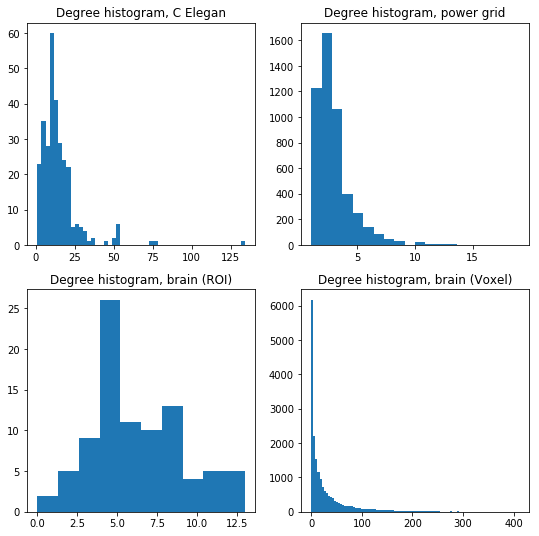

In [11]:
##### Degree sequence
k_CEleg = [d for n, d in G_CEleg.degree()]
k_Power = [d for n, d in G_Power.degree()]
k_ROI = [d for n, d in G_ROI.degree()]
k_Voxel = [d for n, d in G_Voxel.degree()]


##### Degree histogram
plt.figure(figsize=[9,9])

plt.subplot(221)
plt.hist(k_CEleg,50)
plt.title('Degree histogram, C Elegan')

plt.subplot(222)
plt.hist(k_Power,20)
plt.title('Degree histogram, power grid')

plt.subplot(223)
plt.hist(k_ROI,10)
plt.title('Degree histogram, brain (ROI)')

plt.subplot(224)
plt.hist(k_Voxel,100)
plt.title('Degree histogram, brain (Voxel)')

plt.show()

In the degree distribution of the C Elegans neural network, while the majority of nodes have degree of 20 or fewer, there are a few hubs whose degree is greater than 50. Now let us re-plot this distribution.

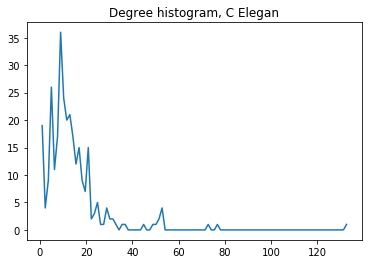

In [12]:
##### Re-plotting the degree distribution (C Elegan)
# getting counts for each bin
[n_CEleg, bin_CEleg] = np.histogram(k_CEleg,100)

# plotting the counts
plt.plot(bin_CEleg[:-1], n_CEleg)
plt.title('Degree histogram, C Elegan')
plt.show()

Since the magnitude of hubs is tremendously different from the rest of the distribution, let's plot this on log-log scale.

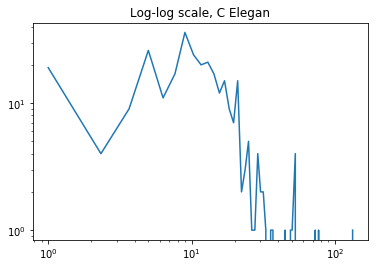

In [13]:
# log-log scale
plt.plot(bin_CEleg[:-1], n_CEleg)
plt.title('Log-log scale, C Elegan')
plt.xscale('log')
plt.yscale('log')
plt.show()

You may notice that this distribution looks rather *noisy*. For a cleaner degree distribution plot, we can plot the node degrees against their ranks (from largest to smallest).

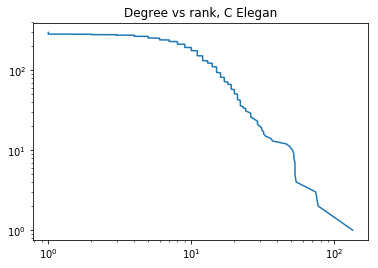

In [14]:
# plotting the degree sequence vs rank
sk_CEleg = sorted(k_CEleg, reverse=True) # sorting in descending
plt.plot(sk_CEleg, np.arange(1,len(sk_CEleg)+1))
plt.title('Degree vs rank, C Elegan')
plt.xscale('log')
plt.yscale('log')
plt.show()


Much better! This plot represents the cumulative degree distribution. ====mention straightness====

* Efficiency (local & global)
* Degree distribution
* Assortativity
* Comparing network stats
   * Network level
   * Node level
* Further readings

# *Further readings*
<hr style="height:1px;border:none" />

* Latora V, Marchiori M. 2001. Efficient Behavior of Small-World Networks. Phys. Rev. Lett. 87, 198701.